In [1]:
#from Chemometrics  import import_common
from Chemometrics.import_common import *
from Chemometrics.basic import *
from numpy import unique
%matplotlib inline

~~~py
import glob
csvs = glob.glob('./**/*.csv')
labels = [re.search('[A-Z0-9-]+(?=\.csv)',csv)[0] for csv in csvs]
def read_hplc_csv(hplc_csv):
    with open(hplc_csv,'rb') as csv:
        hplc = pd.read_csv(csv,header=None,names=['retension_time','intensity']).set_index('retension_time')
        return hplc
hplcs = [read_hplc_csv(csv) for csv in csvs]
hplc = pd.concat(hplcs,axis=1)
hplc.columns = labels
psave({'hplc':hplc,'labels':labels},'tw20_hplc.p')
~~~

In [2]:
data = pload('tw20_hplc.p')
hplc=data['hplc']
labels=data['labels']

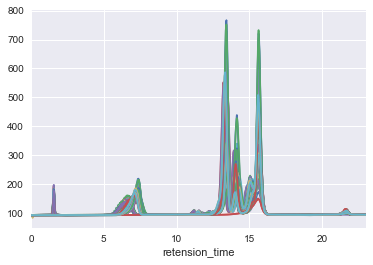

In [3]:
f_hplc = plt.figure(figsize=(10,5))
hplc.plot(legend=False)
plt.show()

In [4]:
labels_ = [x[0] for x in labels]

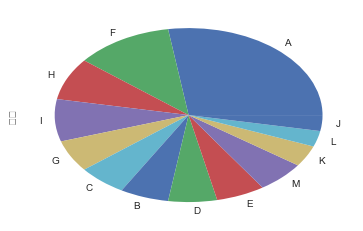

In [5]:
pd.Series(labels_,name='厂家').value_counts().plot.pie()

# 降维

In [6]:
stds = hplc.T.apply(np.std)

In [7]:
hplc.shape

(110399, 102)

In [8]:
d1 = hplc.diff()

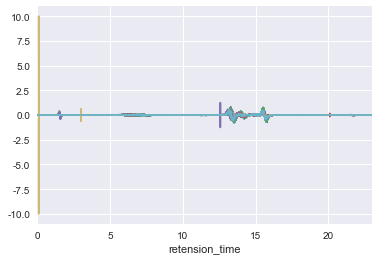

In [9]:
d1.plot(legend=False)

In [10]:
from Chemometrics.basic import *
d1_0 = np.isclose(0,d1,0,.02).all(axis=1)
cal_pct(d1_0)

0.7279957245989547

(30029, 102)

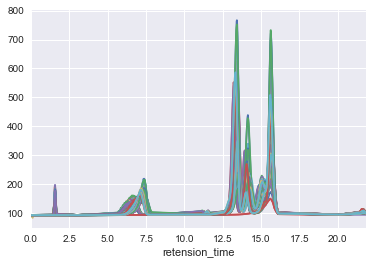

In [11]:
hplc_ = hplc.loc[~d1_0]
hplc_.plot(legend=False)
hplc_.shape

- PCA

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=20).fit(hplc.T)

In [14]:
n_pca = sum(pca.explained_variance_ratio_.cumsum()<.999)

In [15]:
scores = pca.transform(hplc.T)[:,:n_pca]

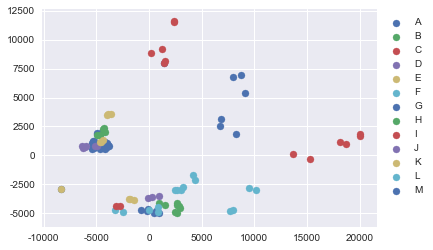

In [16]:
for l in unique(labels_):
    col = np.isin(labels_,l)
    plt.scatter(scores[col,0],scores[col,1],label=l)
plt.legend(bbox_to_anchor=(1,1))

# lstm
- 太长

In [17]:
import peakutils

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif

(110399, 102)

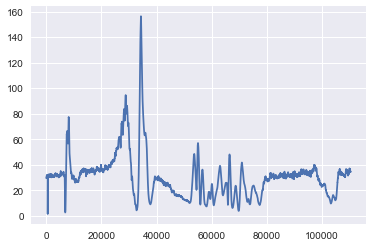

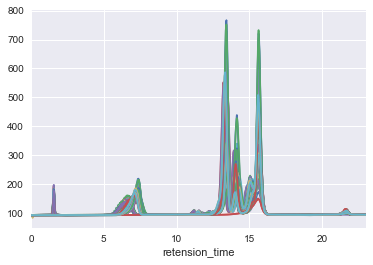

In [19]:
a = SelectKBest(f_classif,k='all').fit(hplc.T,labels_)
plt.plot(a.scores_)
hplc.plot(legend=False)
hplc.shape

(110399, 102)

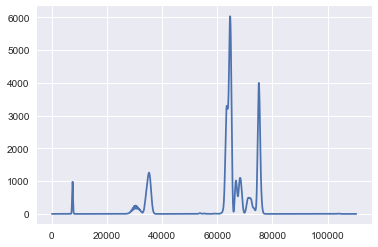

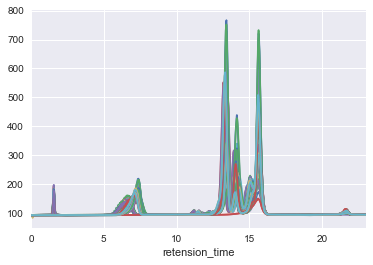

In [20]:
a = SelectKBest(chi2,k='all').fit(hplc.T,labels_)
plt.plot(a.scores_)
hplc.plot(legend=False)
hplc.shape

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM